# ANALYZING EMPLOYEE ATTRITION

## ABSTRACT
>Employee turnover is a serious concern in knowledge based organizations. When employees leave an organization, they
carry with them invaluable tacit knowledge which is often the source of competitive advantage for the business. In order for
an organization to continually have a higher competitive advantage over its competition, it should make it a duty to minimize
employee attrition. This study identifies employee related attributes that contribute to the prediction of employees’ attrition
in organizations.

#### The below study have following Observations:
1. Age 
2. Attrition 
3. BusinessTravel 
4. DailyRate 
5. Department
6. DistanceFromHome
7. Education 
8. EducationField 
9. EmployeeCount
10. EmployeeNumber 
11. EnvironmentSatisfaction 
12. Gender 
13. HourlyRate
14. JobInvolvement 
15. JobLevel 
16. JobRole 
17. JobSatisfaction
18. MaritalStatus 
19. MonthlyIncome 
20. MonthlyRate 
21. NumCompaniesWorked
22. Over18 
23. OverTime 
24. PercentSalaryHike 
25. PerformanceRating
26. RelationshipSatisfaction 
27. StandardHours 
28. StockOptionLevel
29. TotalWorkingYears 
30. TrainingTimesLastYear 
31. WorkLifeBalance
32. YearsAtCompany 
33. YearsInCurrentRole 
34. YearsSinceLastPromotion
35. YearsWithCurrManager


>Lets see how these observations are helping to predict our Goal Employee "Attrition prediction".

##### We will start our Analysis in importing the required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df['Attrition'].replace("No", 0, inplace = True)
df['Attrition'].replace("Yes", 1, inplace = True)
#we are replacing "No" with 0 and "Yes" with 1.

# EDA

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### There is no Null values in the data which is benificial in our EDA lets also convert all categorical alphabet data into numeric.

In [6]:
cols = df.columns
num_cols = df._get_numeric_data().columns

catagorical_data =list(set(cols) - set(num_cols))
catagorical_data

['JobRole',
 'Gender',
 'Department',
 'OverTime',
 'Over18',
 'MaritalStatus',
 'BusinessTravel',
 'EducationField']

# Encoding the Data with Label Encoder converting all the catagorical data into numeric values.

In [7]:
from sklearn.preprocessing import LabelEncoder
    LE= LabelEncoder()


for i in catagorical_data:
    df[i]=LE.fit_transform(df[i])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

#### From the above observation we see that we have no NaN values and we have converted all catorigical data into numeric values using label encoder. Lets further analysise the Correlation of the data Visulation.

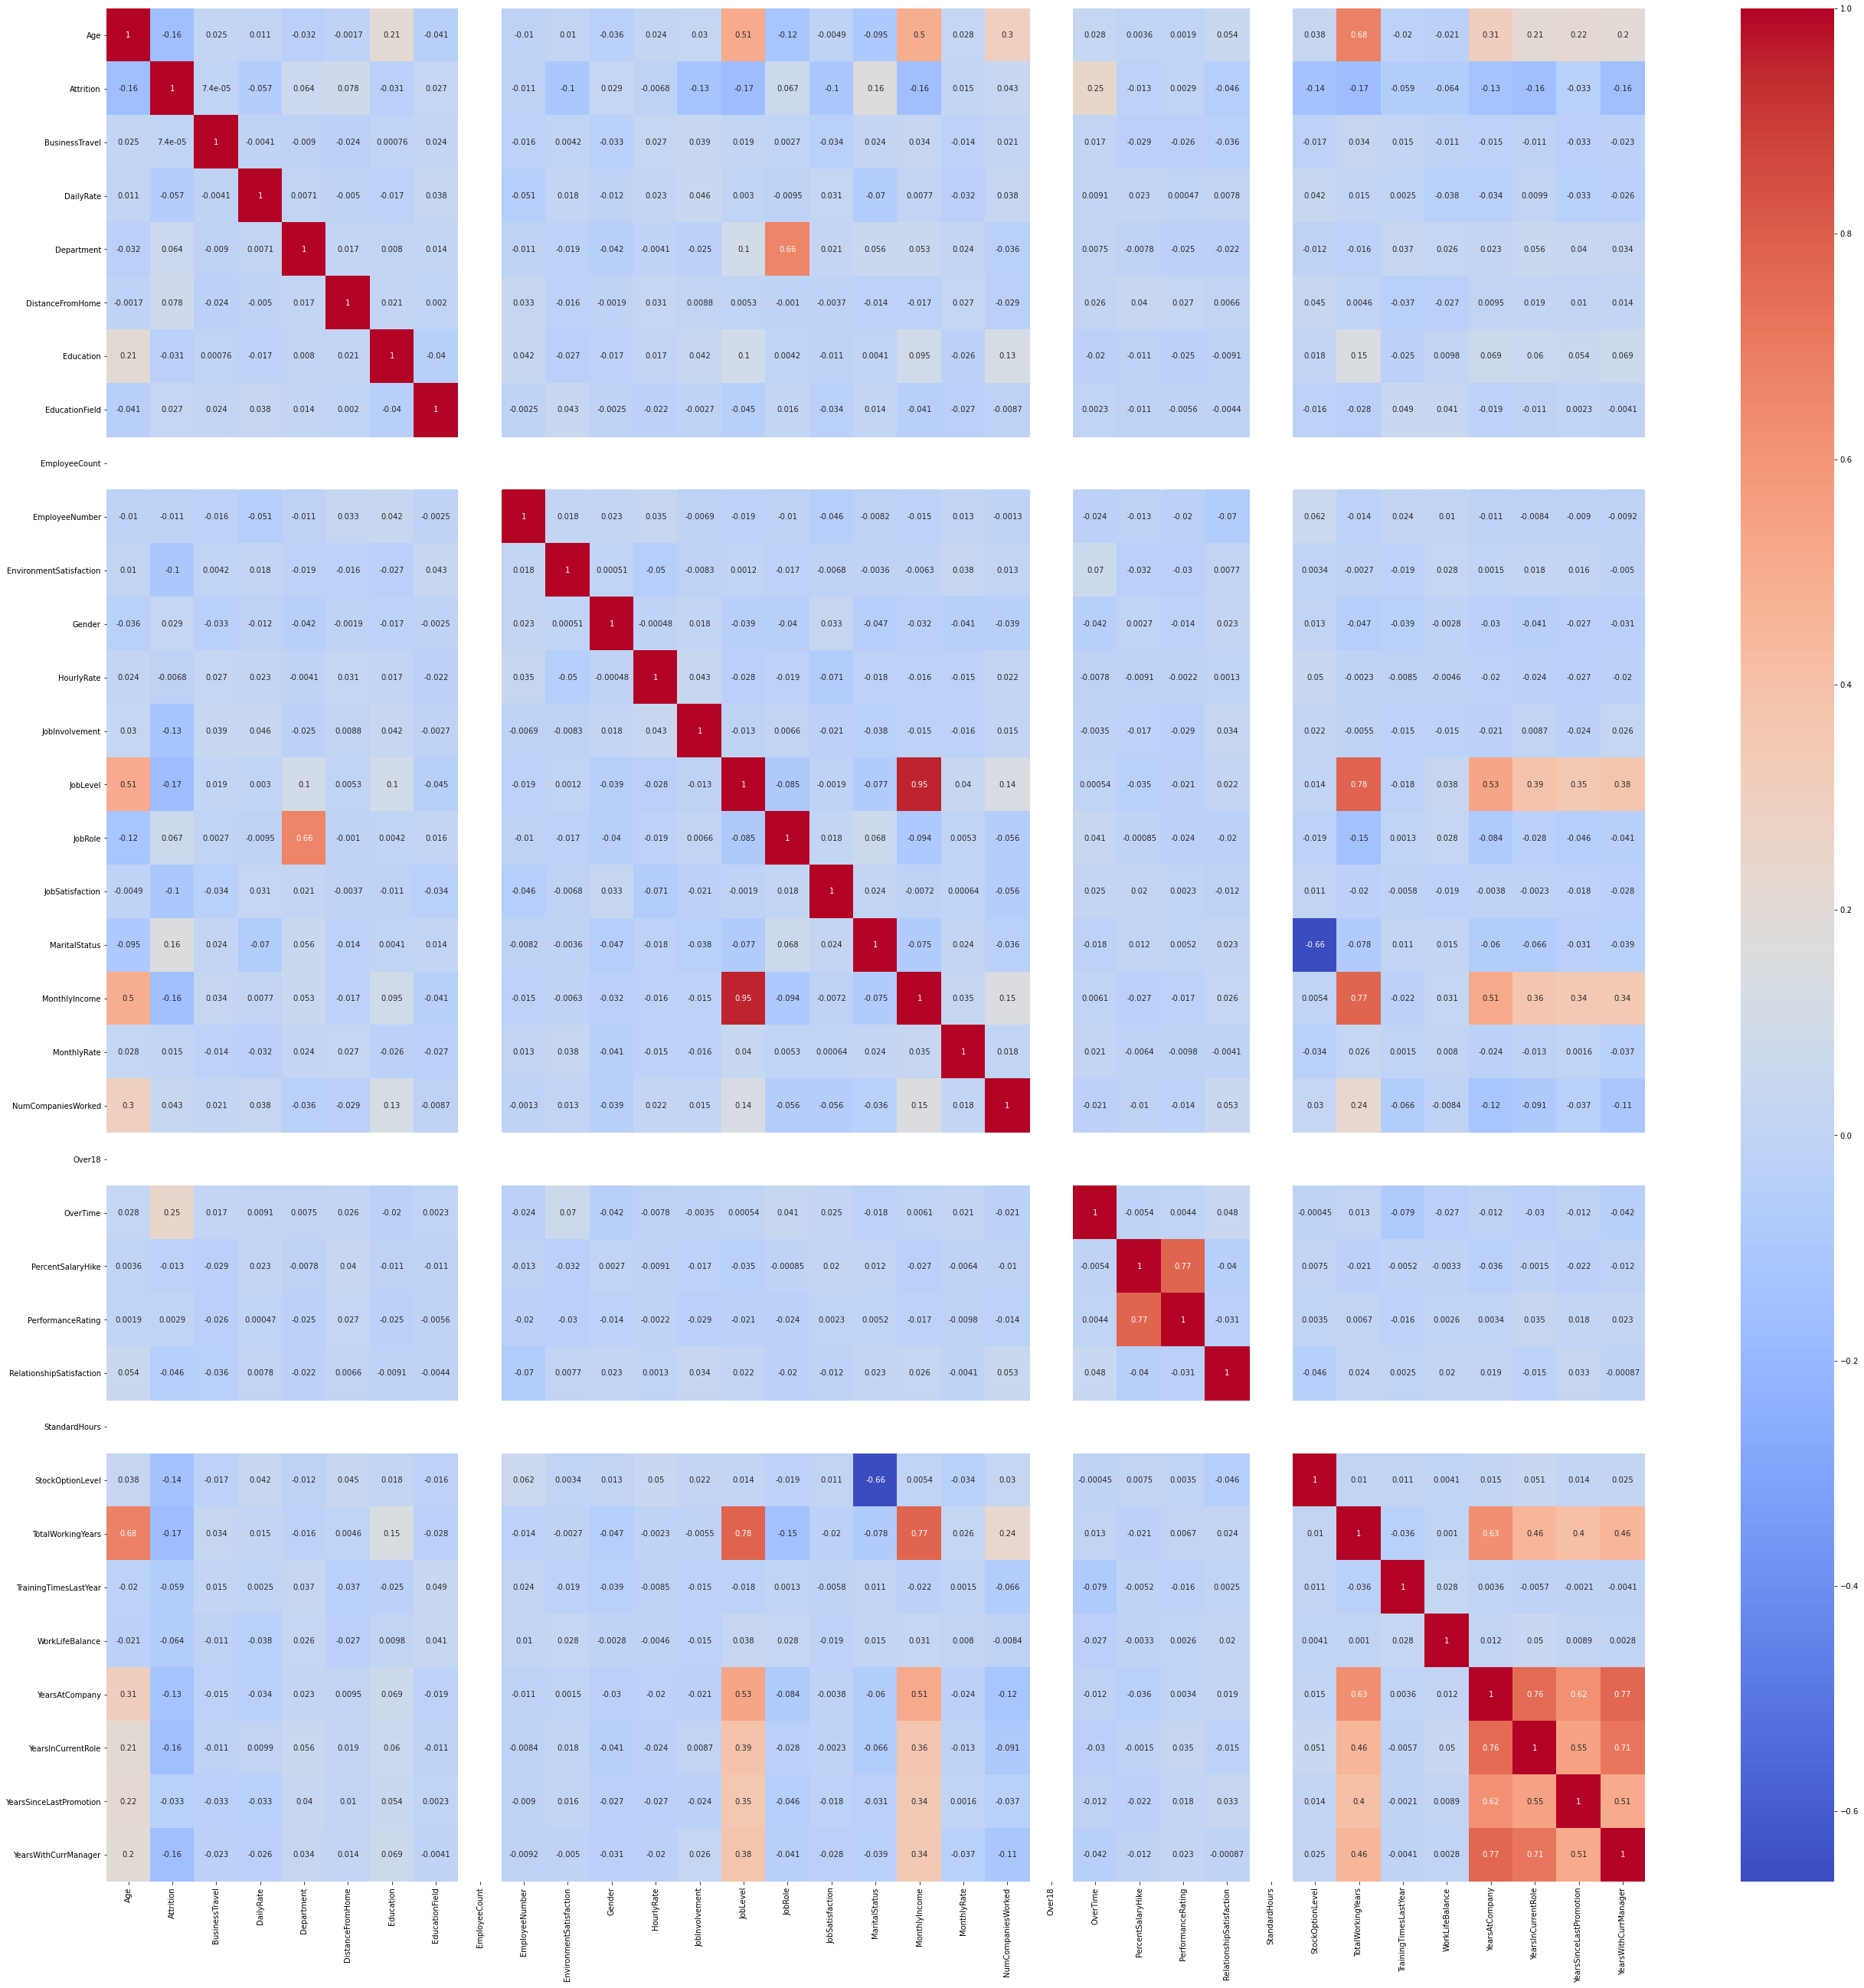

In [9]:
plt.figure(figsize=(45,45))
sns.heatmap(df.corr(),annot = True, cmap = "coolwarm")
plt.show()

In [10]:
df.corr().isna().sum()>3

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount                True
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                       True
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

#### We can see there are three columns that have no correlation in the whole dataset hence we will drop those columns which have no effect on prediction.

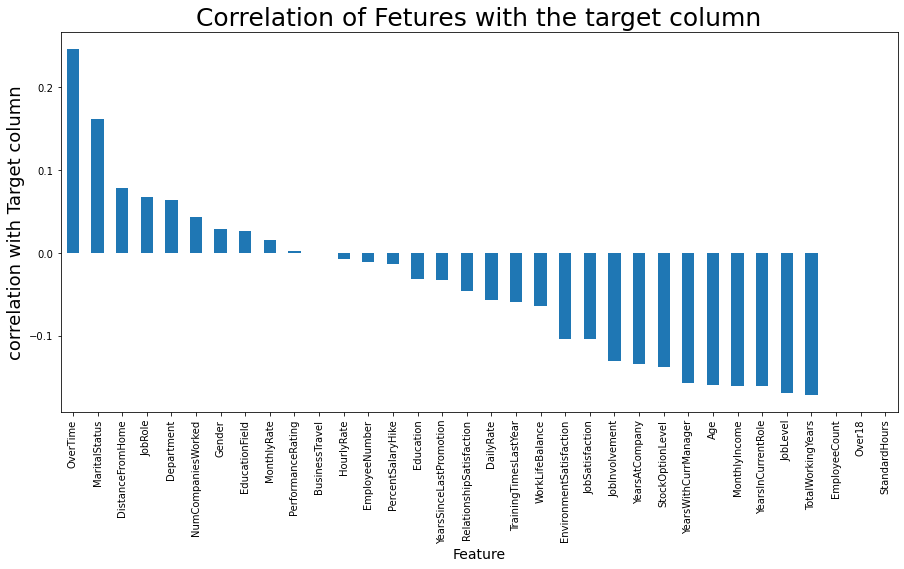

In [11]:
plt.figure(figsize=(15,7))
df.corr()["Attrition"].sort_values(ascending=False).drop(["Attrition"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

## Key observation:
    We also can see that the BusinessTravel has no correlation we also will drop that column
    lets also see the numerical figures of the correlations.

In [12]:
corr = [df.corr()["Attrition"].sort_values(ascending=False).drop(["Attrition"])]
corr

[OverTime                    0.246118
 MaritalStatus               0.162070
 DistanceFromHome            0.077924
 JobRole                     0.067151
 Department                  0.063991
 NumCompaniesWorked          0.043494
 Gender                      0.029453
 EducationField              0.026846
 MonthlyRate                 0.015170
 PerformanceRating           0.002889
 BusinessTravel              0.000074
 HourlyRate                 -0.006846
 EmployeeNumber             -0.010577
 PercentSalaryHike          -0.013478
 Education                  -0.031373
 YearsSinceLastPromotion    -0.033019
 RelationshipSatisfaction   -0.045872
 DailyRate                  -0.056652
 TrainingTimesLastYear      -0.059478
 WorkLifeBalance            -0.063939
 EnvironmentSatisfaction    -0.103369
 JobSatisfaction            -0.103481
 JobInvolvement             -0.130016
 YearsAtCompany             -0.134392
 StockOptionLevel           -0.137145
 YearsWithCurrManager       -0.156199
 Age        

# Key observation:
    The correlation is very less in all the variable but however the top two contestants are
    OverTime                    0.246118
    TotalWorkingYears          -0.171063
    Employees who have more work experience trends not to leave organization which is logically true and
    Employees who do over time trends leaving the organization.

# Attrition affecting Companies

>A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [13]:
df.drop(["EmployeeCount","Over18", "StandardHours","BusinessTravel"], inplace = True, axis = 1)

# Skeness Identification

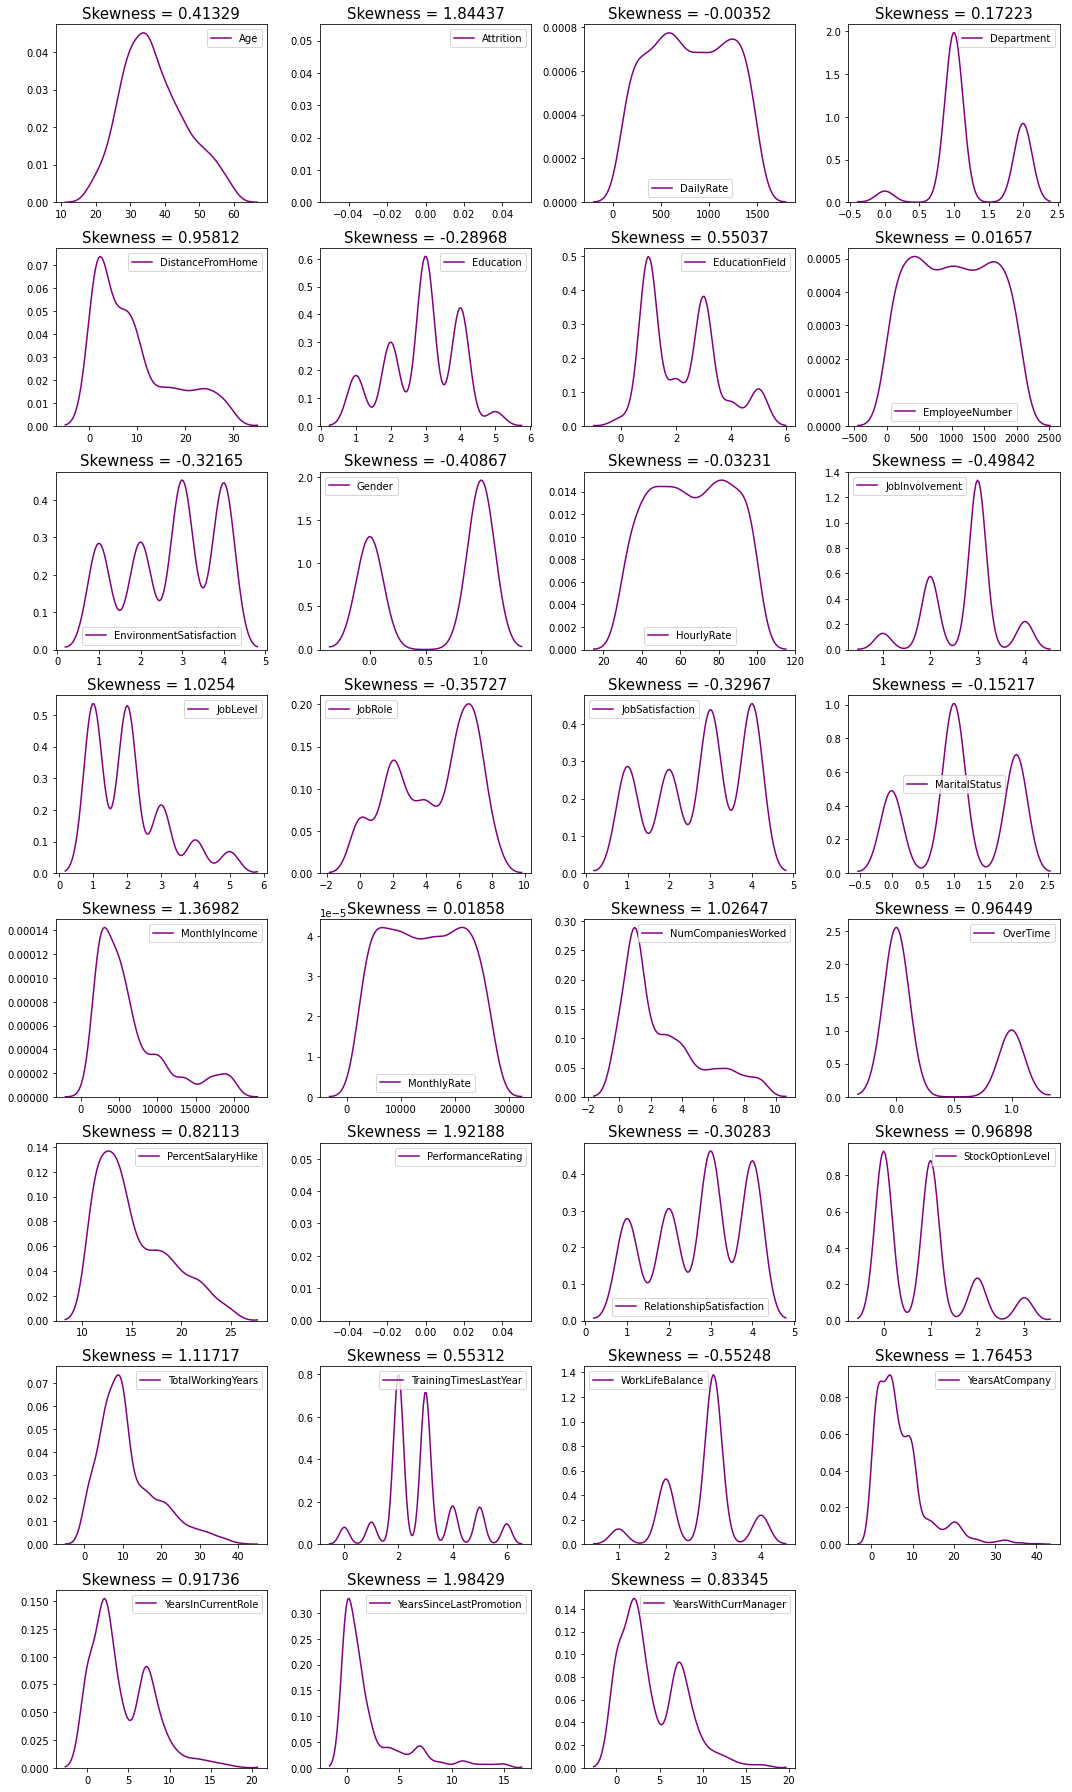

In [14]:
plt.figure(figsize=(15,25))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(8,4,i+1)         
    sns.kdeplot(df[collist[i]], color = "purple")
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

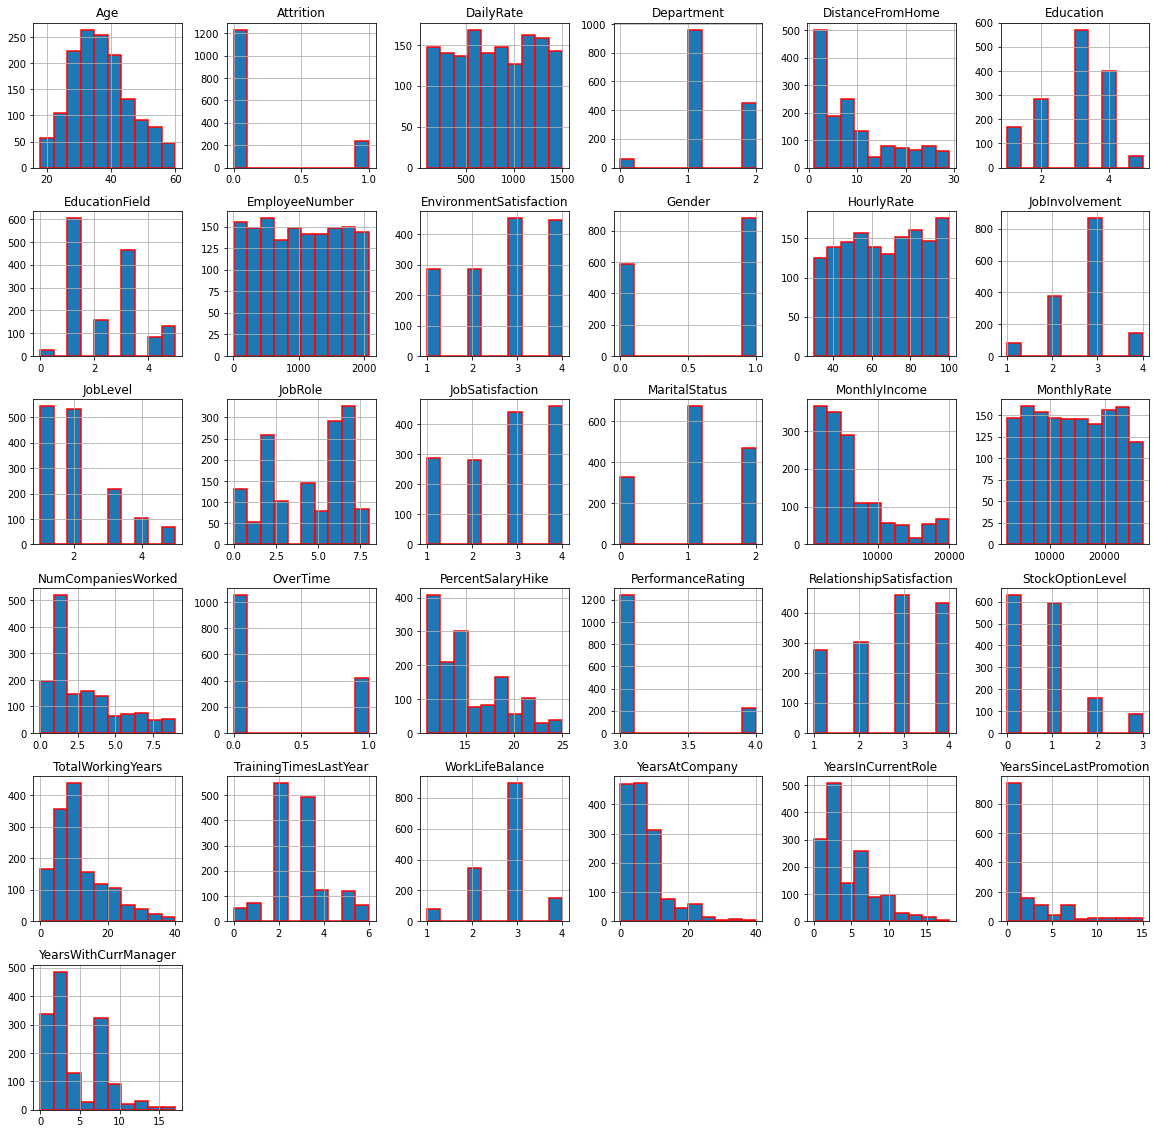

In [15]:
df.hist(edgecolor="red",linewidth= 1.5, figsize= (20,20))
plt.show()

In [16]:
skewness=[]
for i in df.skew().values:
    skewness.append(i)
    
df_skewness= pd.DataFrame({"Feature_names": collist,"Skew": skewness})
df_skewness= df_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in df_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
df_skewness

,Feature_names,Skew
0,YearsSinceLastPromotion,1.984290
1,PerformanceRating,1.921883
2,Attrition,1.844366
3,YearsAtCompany,1.764529
4,MonthlyIncome,1.369817
5,TotalWorkingYears,1.117172
6,NumCompaniesWorked,1.026471
7,JobLevel,1.025401
8,StockOptionLevel,0.968980
9,OverTime,0.964489


In [17]:
print("\n\nFeature names with Skewness is present more than +/-0.5 as follows:\n",
      "\n\nPostive Skewed data:\n", skew_postive_row,
      "\n\nnegative Skewed data:\n", skew_negative_row)       



Feature names with Skewness is present more than +/-0.5 as follows:
 

Postive Skewed data:
 ['YearsSinceLastPromotion', 'PerformanceRating', 'Attrition', 'YearsAtCompany', 'MonthlyIncome', 'TotalWorkingYears', 'NumCompaniesWorked', 'JobLevel', 'StockOptionLevel', 'OverTime', 'DistanceFromHome', 'YearsInCurrentRole', 'YearsWithCurrManager', 'PercentSalaryHike', 'TrainingTimesLastYear', 'EducationField'] 

negative Skewed data:
 ['JobInvolvement', 'WorkLifeBalance']


In [18]:
df.skew().mean()

0.5159015697045992

In [19]:
skew_postive_row.remove('Attrition')

# Key Observation:
    We have 20 columns which has skewness greater than +/- 0.5 as mentioned above. 
    And also average skewness of whole dateset is than 0.4.

# Skewness Removal

In [20]:
DF=df

In [21]:
from scipy.stats import yeojohnson

for i in skew_postive_row:
    DF[i]= yeojohnson(DF[i])[0]
for i in skew_negative_row:
    DF[i]= yeojohnson(DF[i])[0]    

BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA


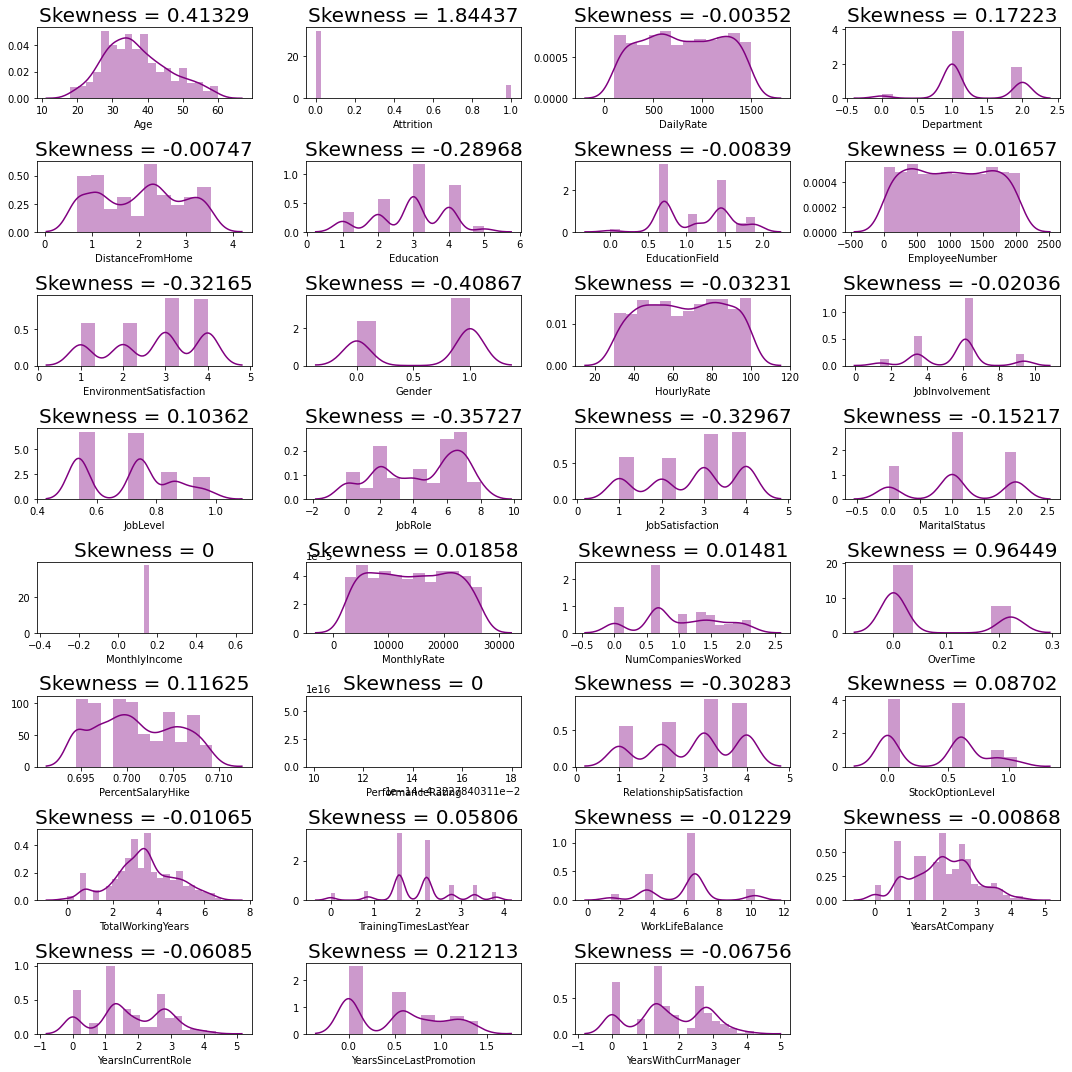

In [22]:
print("BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA")
plt.figure(figsize=(15,15))
for i in range (0, len(collist)):
    plt.subplot(8,4,i+1)
    plt.title(f"Skewness = {round(DF[collist[i]].skew(),5)}",fontsize=20)         
    sns.distplot(DF[collist[i]], color = "purple")
    plt.tight_layout()

In [23]:
df=DF

## We have removed the skewness of the data by "yeojohnson" method lets check about the Outliers in the data

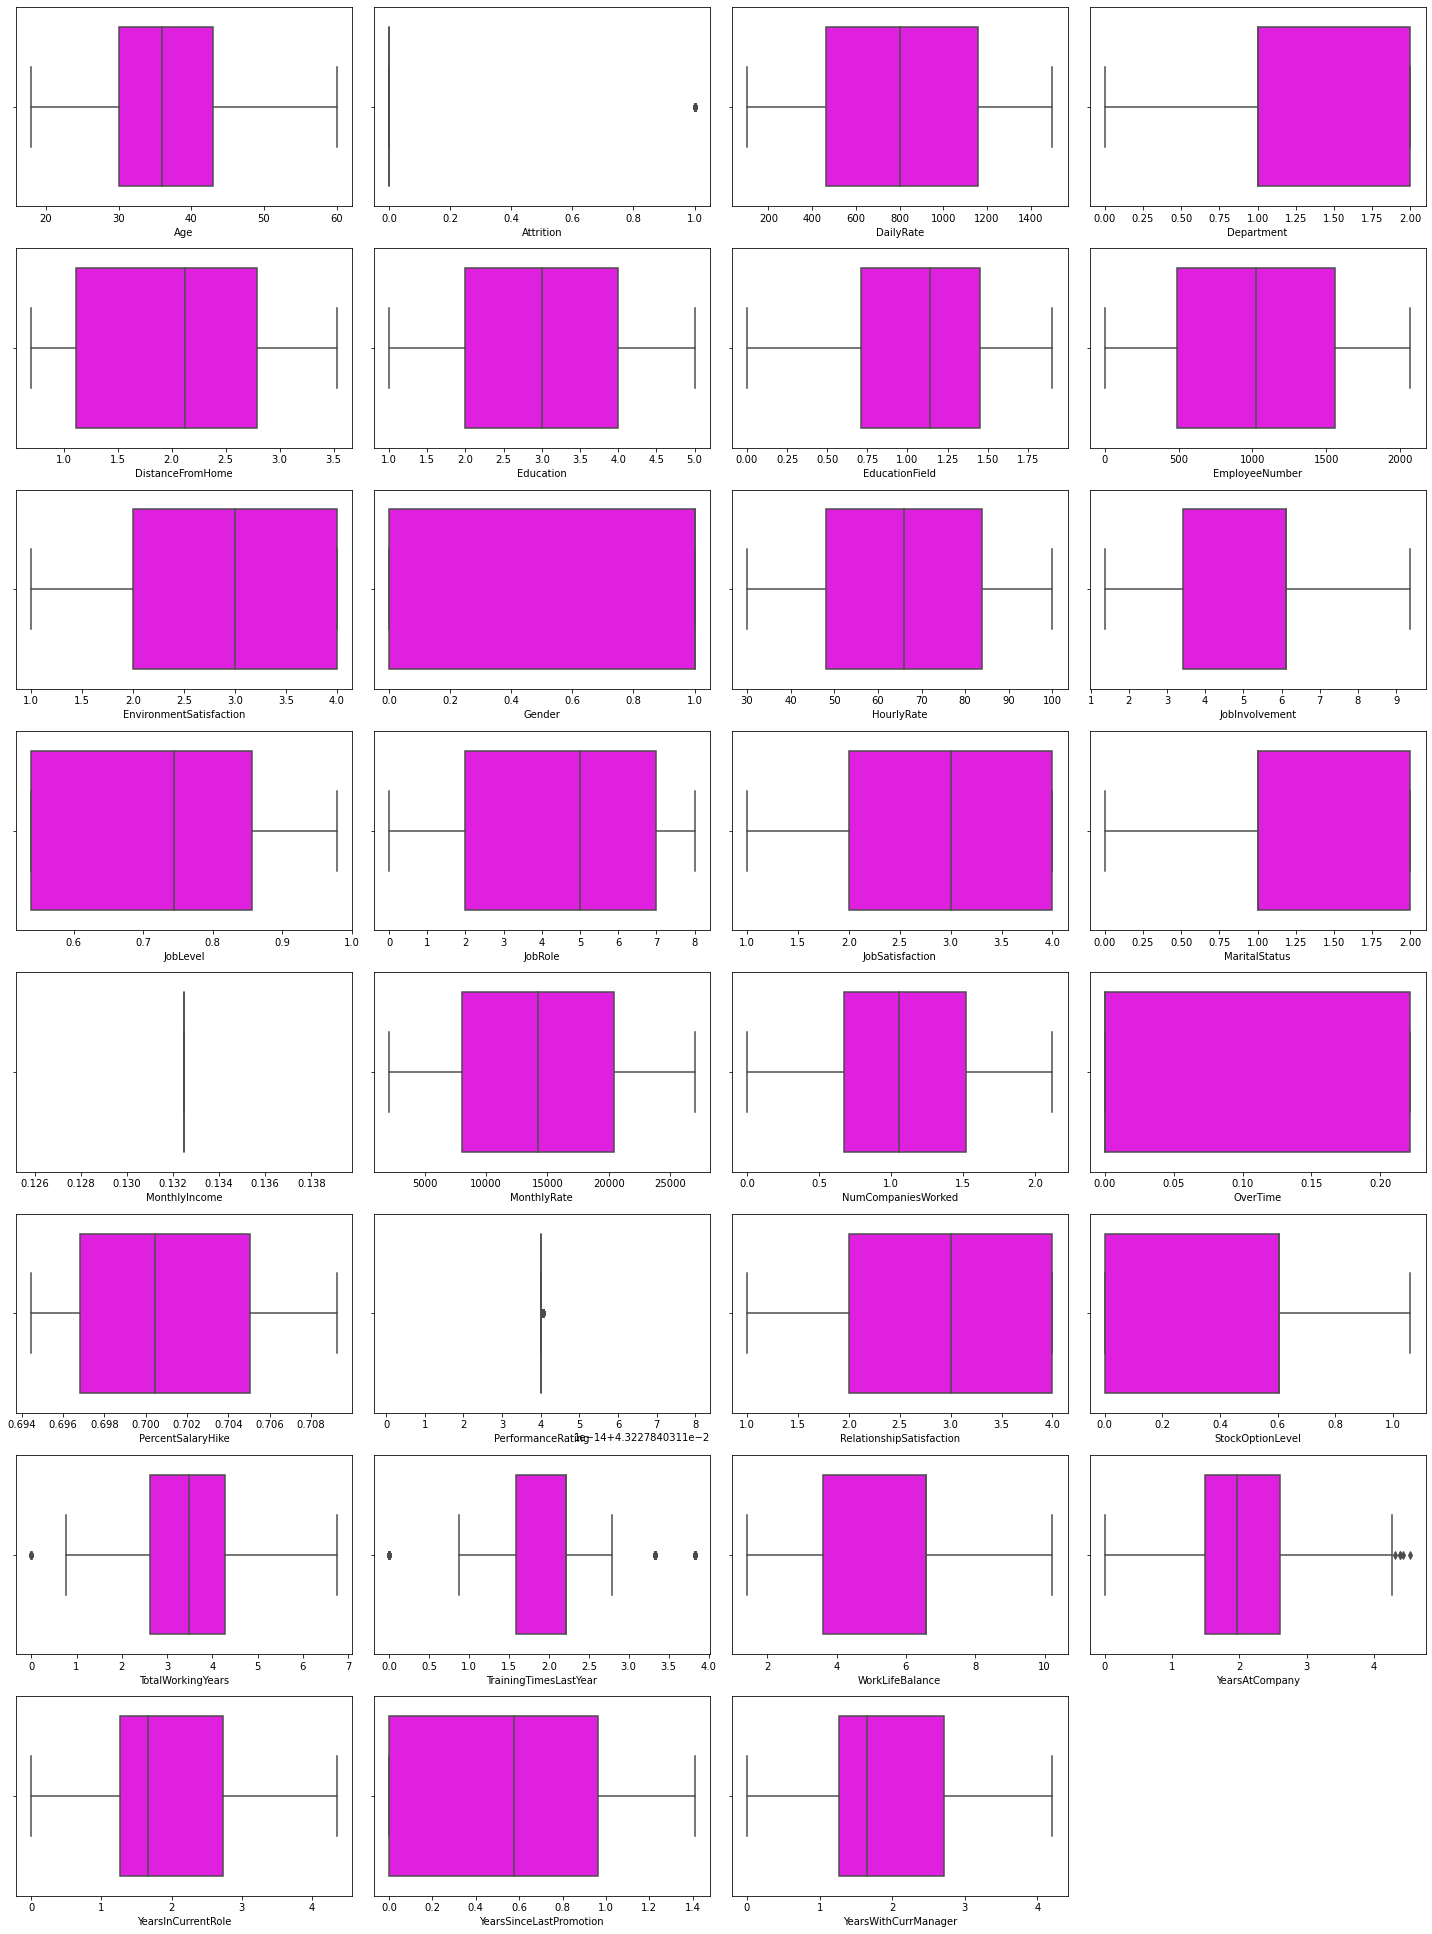

In [24]:
plt.figure(figsize=(20,50))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(15,4,i+1)
    ax=sns.boxplot(df[collist[i]], color = "#FF00FF" , orient = "h")
    ax.set_facecolor("w")
    plt.tight_layout()

#### we  can see only few columns have outliers how so ever outliers are huge in Performance and Attrition removing the same we will might lose the data but lets verify the same                    

In [25]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold= 3
df_new = df[(z < 3).all(axis=1)]


In [26]:
print(f"Orginal Data {df.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((1470-0)/1470)*100}%")

Orginal Data (1470, 31)
After Removing outliers (0, 31)
The percentage of data loss 100.0%


#### The loss of data is 100% so we have to design the model with outliers

In [27]:
orange ="#F25022"
green ="#7FBA00"
grey ="#737373"
yellow ="#FFB900"
blue ="#00A4EF"

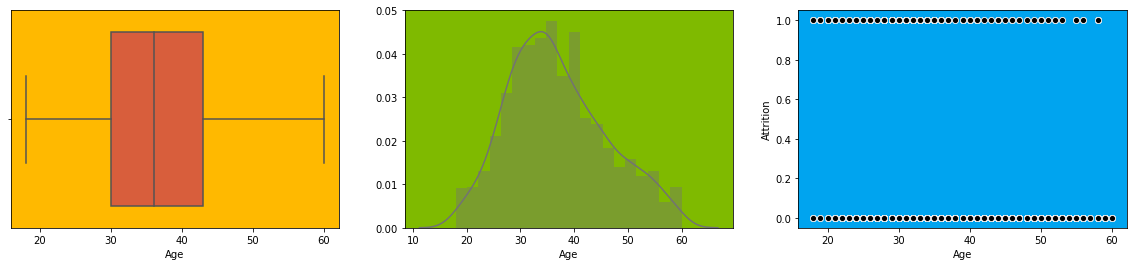

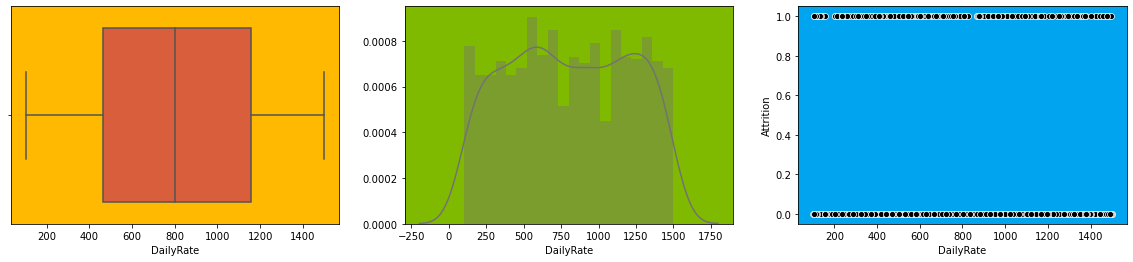

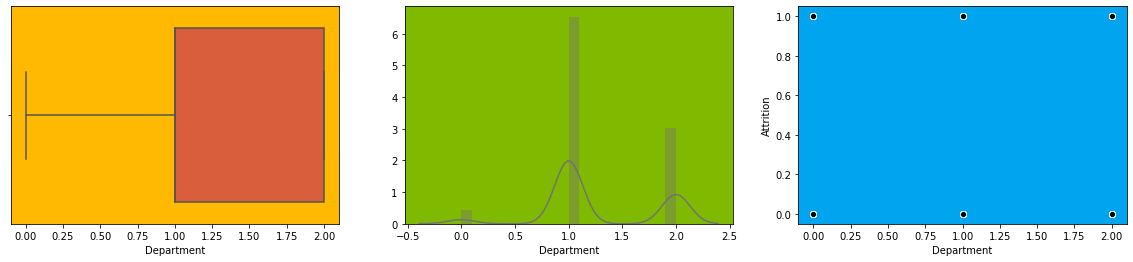

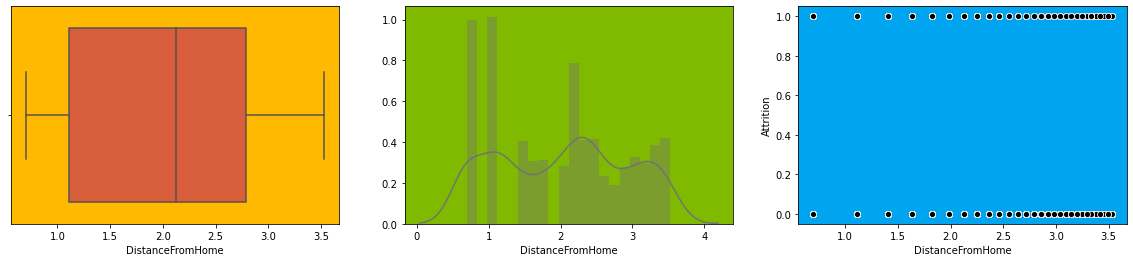

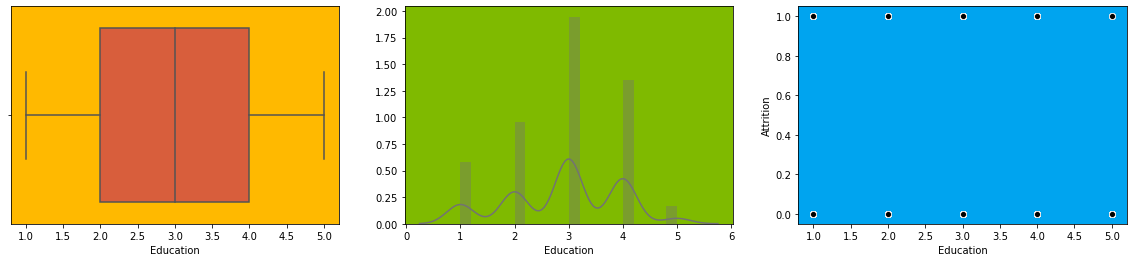

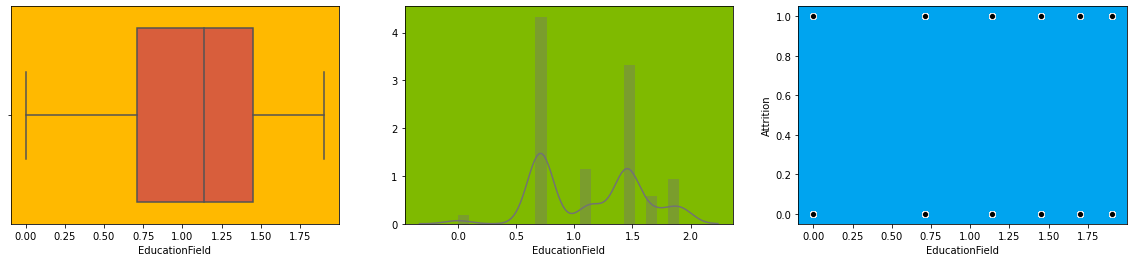

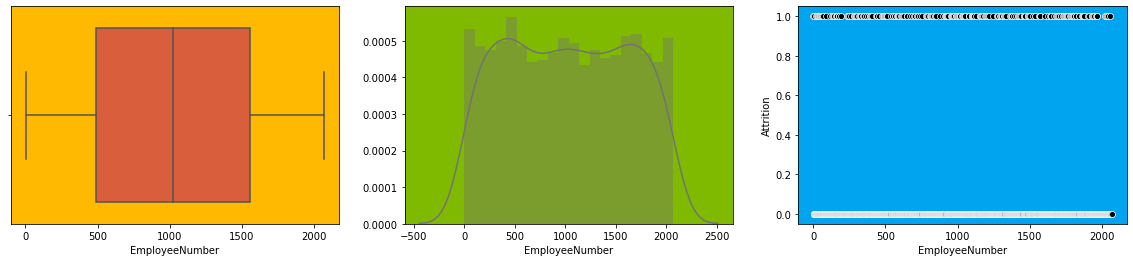

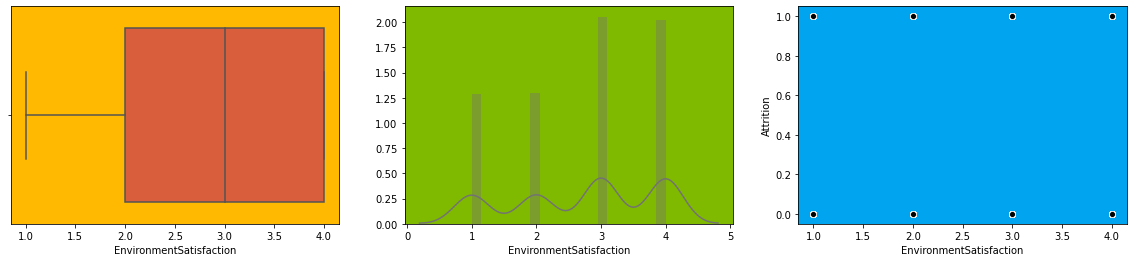

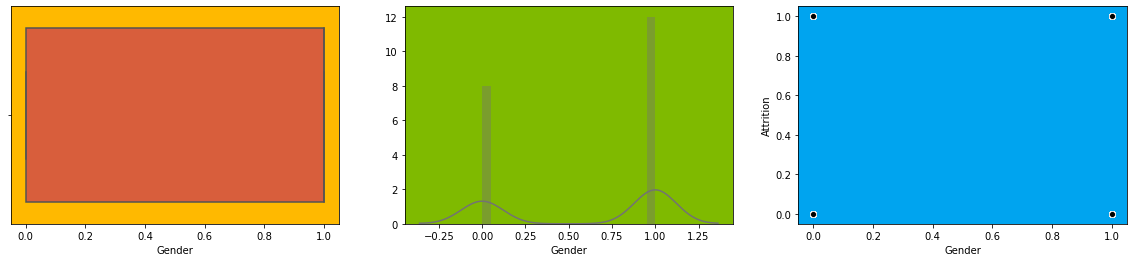

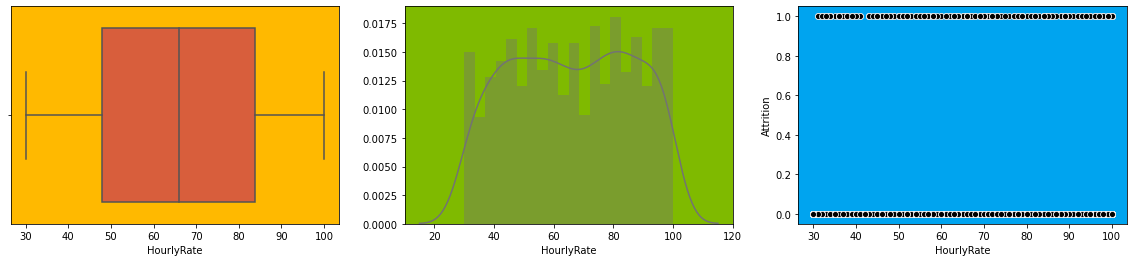

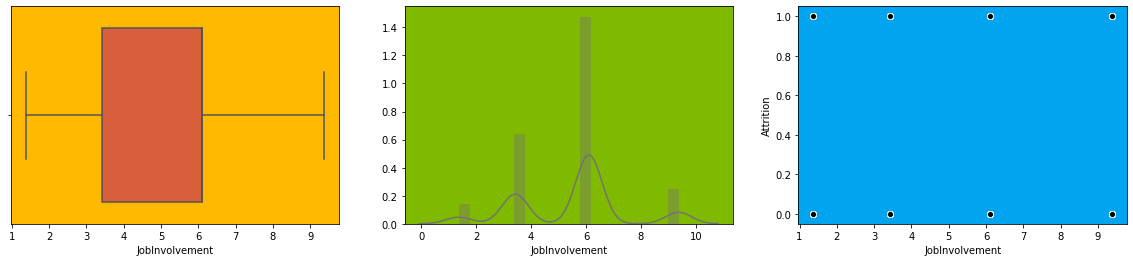

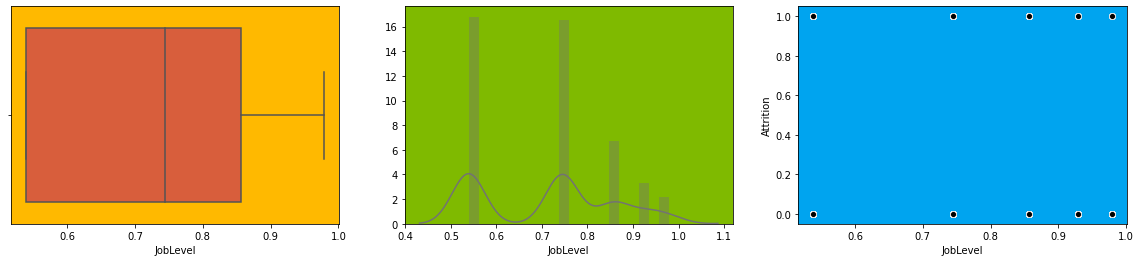

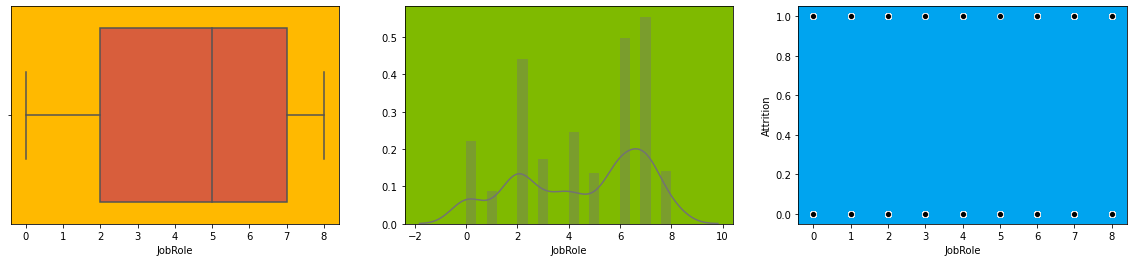

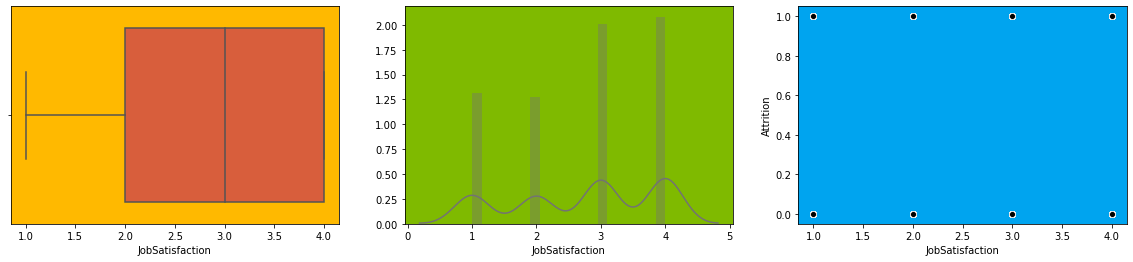

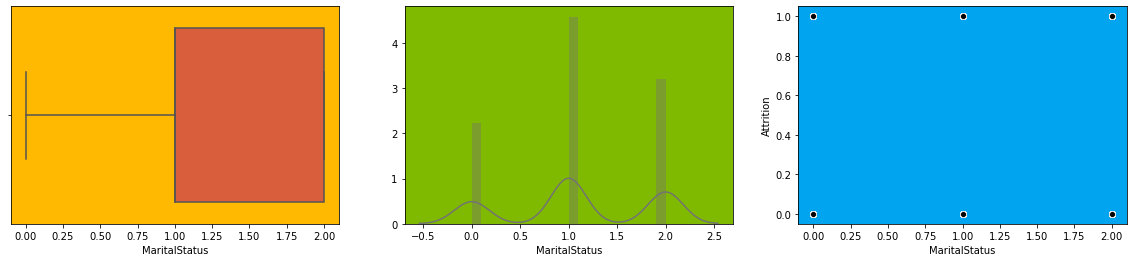

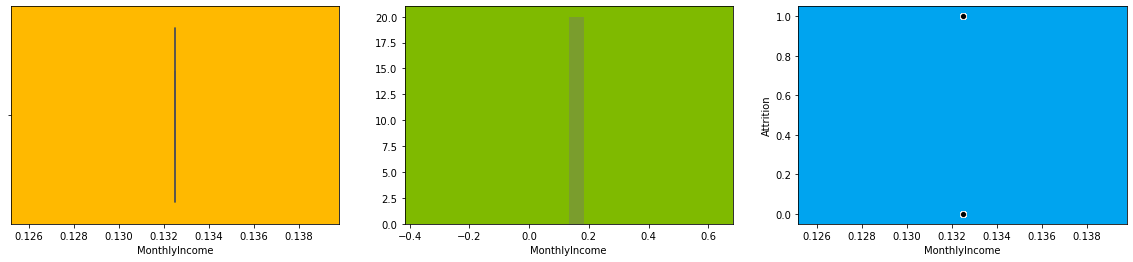

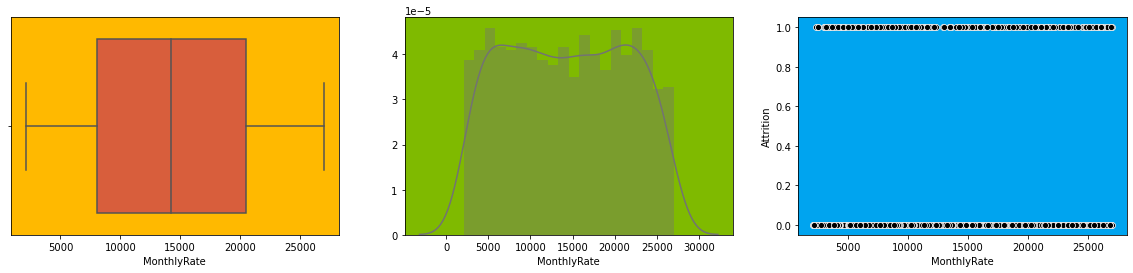

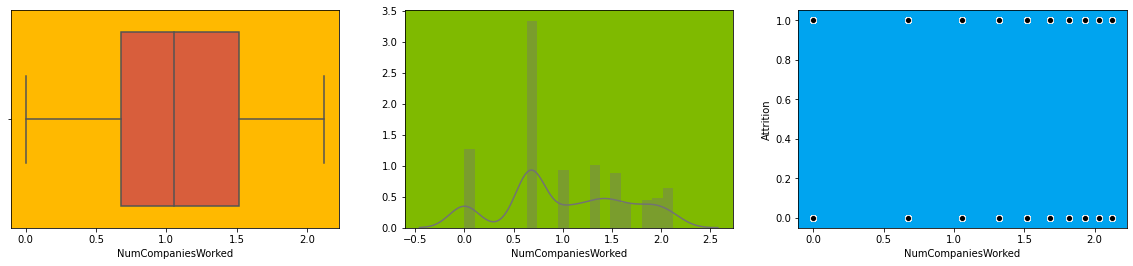

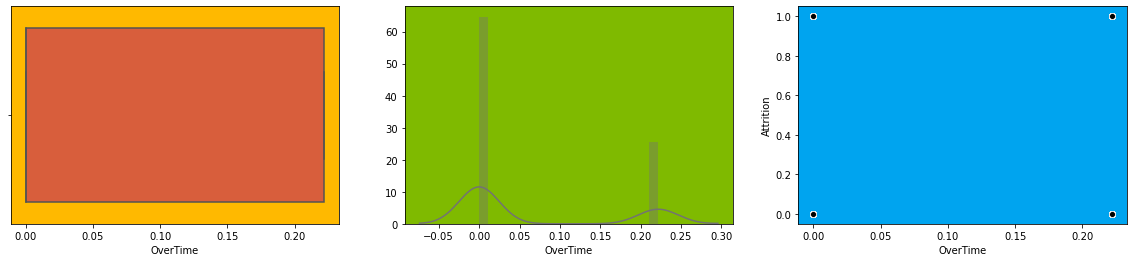

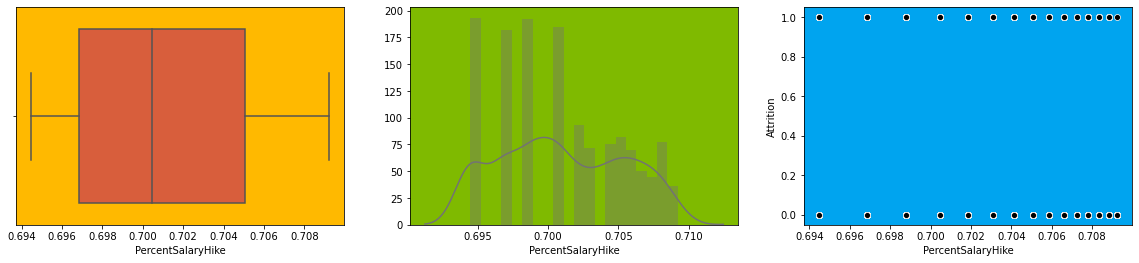

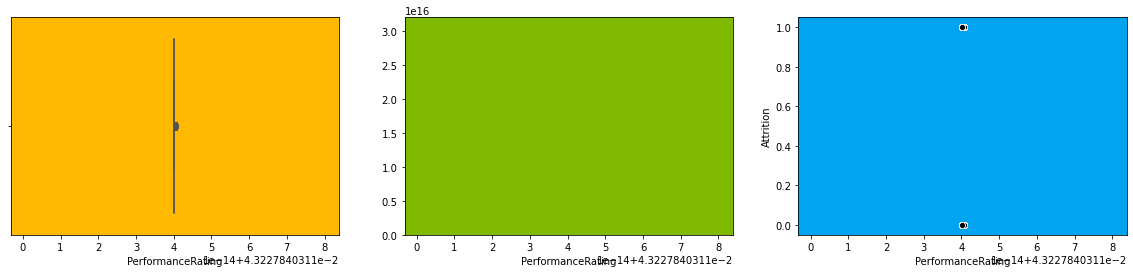

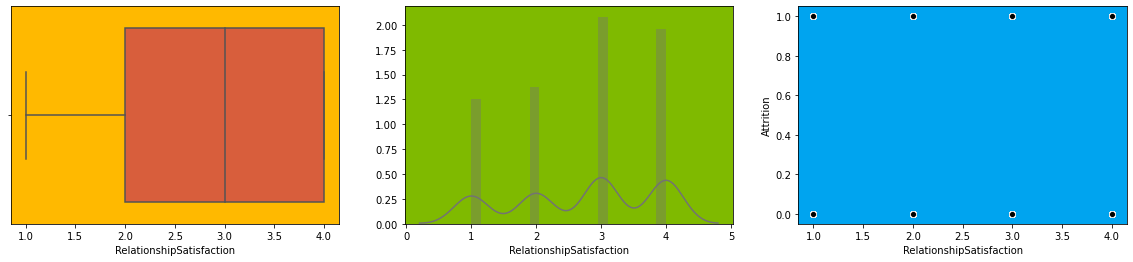

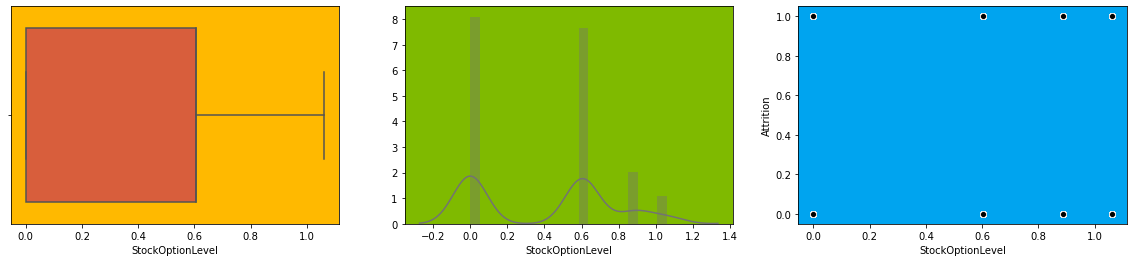

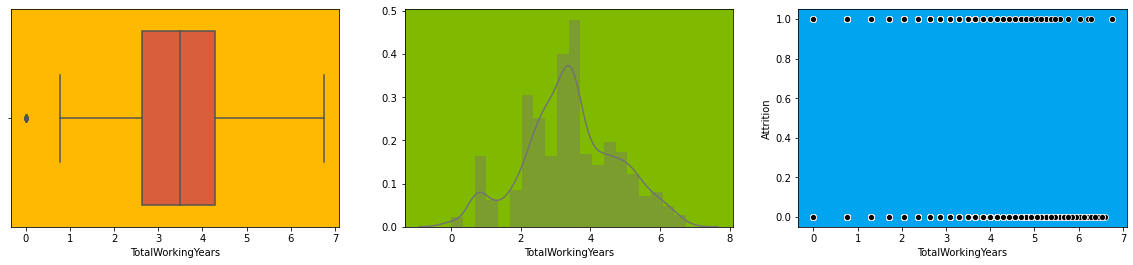

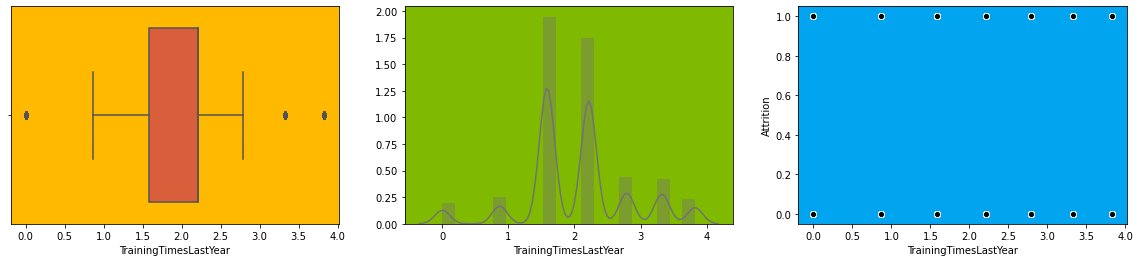

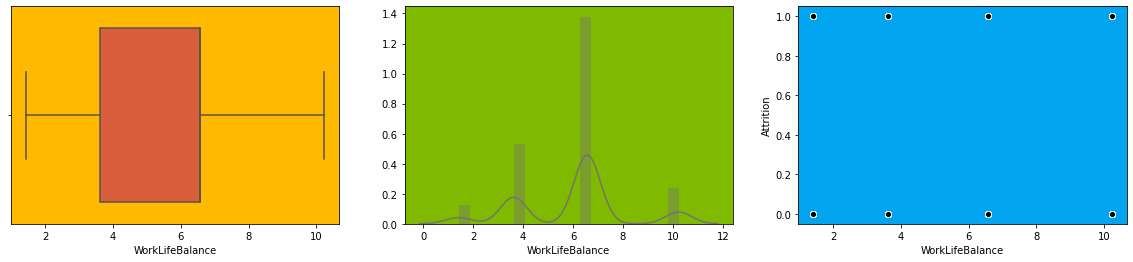

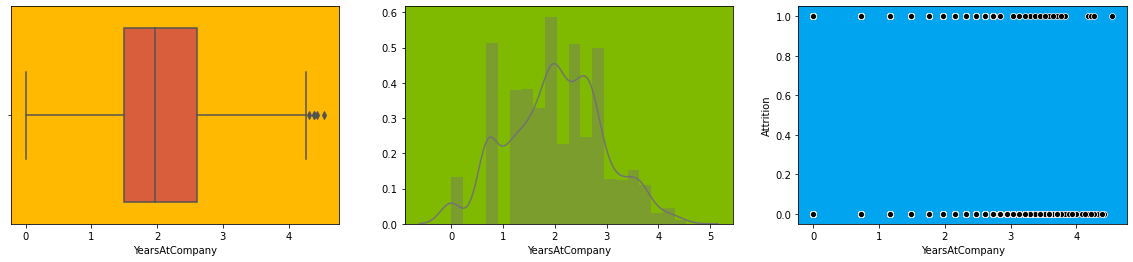

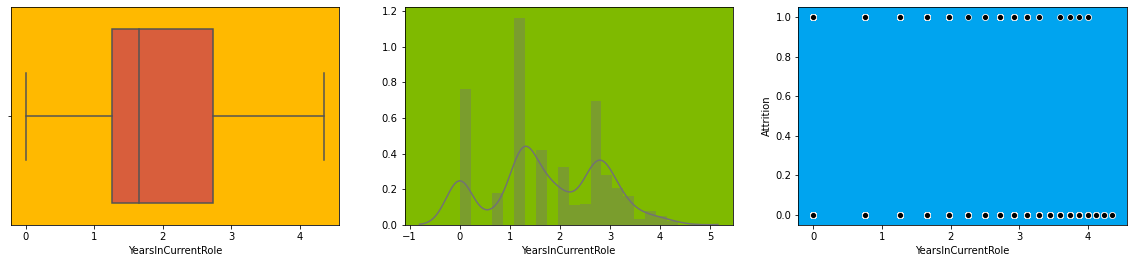

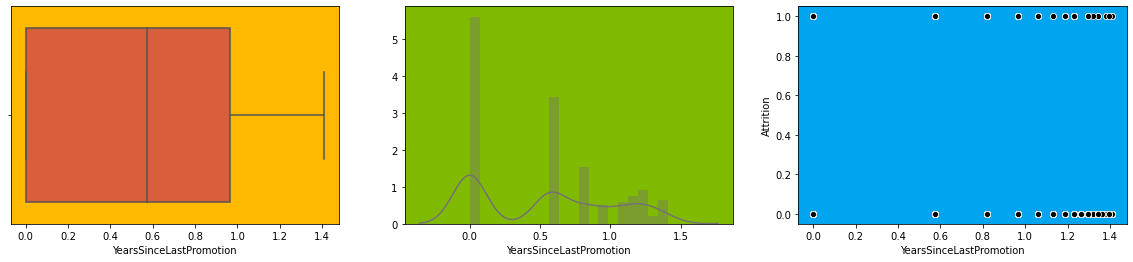

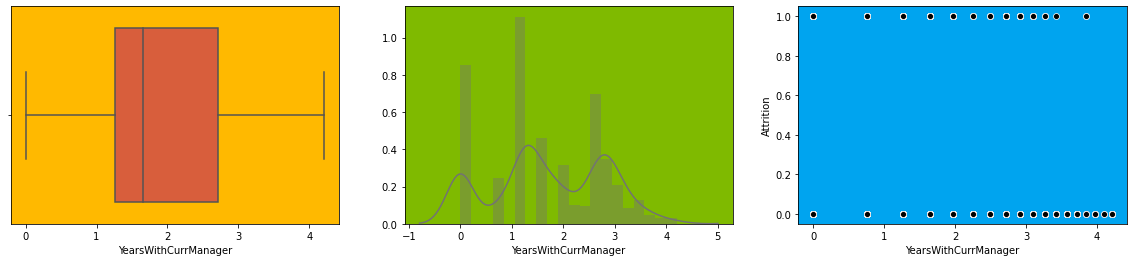

In [28]:
target_variable_1 = "Attrition"
feature_variable = ['Age', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(20, 4))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=orange)
    a1.set_facecolor(yellow)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=grey)
    a2.set_facecolor(green)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable_1, ax=axs[2], color="k")
    a3.set_facecolor(blue)
    plt.show()
    
for i in feature_variable:
    num_plots(i)  

### The above observation will tell us the relationship between the feature variable and how it is scattered in Attrition 

### Scaling the DataSet Before proceeding for training

In [29]:
x=df.drop(["Attrition"], axis = 1)
y=df.Attrition

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))

x=sc.fit_transform(x)

### Selecting Random State parameters

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = r2_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")        

Best Accuracy 29.346240561882396 found on randomstate 154


In [33]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x,y,test_size = .25, random_state = best_rstate)

# Shortlisting Models

In [34]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [35]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [36]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train_1,y_train_1)
    print("Score of", m, "is:", m.score(x_train_1,y_train_1))
    score.append(m.score(x_train_1,y_train_1))
    predm=m.predict(x_test_1)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test_1,predm))
    mean_abs_e.append(mean_absolute_error(y_test_1,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test_1,predm))
    mean_sqr_e.append(mean_squared_error(y_test_1,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test_1,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test_1,predm)))
    print("R2 SCORE: ", r2_score(y_test_1,predm))
    r2.append(r2_score(y_test_1,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.193412761464142

ERROR:
MEAN ABSOLUTE ERROR:  0.23997435405036355
MEAN SQUARED ERROR:  0.10643140747117197
ROOT MEAN SQUARED ERROR : 0.32623826794410854
R2 SCORE:  0.293462405618824
**********************************************************************************************************



Score of Lasso() is: 0.0

ERROR:
MEAN ABSOLUTE ERROR:  0.2814645308924485
MEAN SQUARED ERROR:  0.15162553167966597
ROOT MEAN SQUARED ERROR : 0.38939123215561233
R2 SCORE:  -0.006555686381719772
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.19329410234491007

ERROR:
MEAN ABSOLUTE ERROR:  0.23965440030042945
MEAN SQUARED ERROR:  0.10649543493138063
ROOT MEAN SQUARED ERROR : 0.32633638309477636
R2 SCORE:  0.29303736371827016
**********************************************************************************************************



Score of ElasticNet() is: 0

In [37]:
mean_score= []
STD=[]
for m in models:
    CV=cross_val_score(m,x,y,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS:
SCORE IS: [0.2170182  0.22329063 0.20069345 0.1350818  0.17880752]
MEAN OF SCORE is : 0.19097832119011107
Standard Deviation : 0.03190327144536718
**************************************************************************************************



SCORE OF Lasso() IS:
SCORE IS: [-2.15350159e-05 -2.80274252e-03 -1.51640822e-02 -8.03212851e-04
 -2.80274252e-03]
MEAN OF SCORE is : -0.004318863025072073
Standard Deviation : 0.005532501176876116
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS:
SCORE IS: [0.21857669 0.22387743 0.2001241  0.13769389 0.17824656]
MEAN OF SCORE is : 0.19170373426168624
Standard Deviation : 0.03138905464742904
**************************************************************************************************



SCORE OF ElasticNet() IS:
SCORE IS: [-2.15350159e-05 -2.80274252e-03 -1.51640822e-02 -8.03212851e-04
 -2.80274252e-03]
MEAN OF

In [38]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="SCORE", ascending=False)



,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
6,DecisionTreeRegressor,1.000000,-0.728145,0.240944,0.263587,0.263587,0.513407,-0.749804
8,RandomForestRegressor,0.882209,0.173189,0.042564,0.237473,0.114395,0.338224,0.240594
4,SVR,0.681178,0.190308,0.038882,0.214719,0.101282,0.318248,0.327647
5,KNeighborsRegressor,0.345273,0.083669,0.034314,0.197283,0.127065,0.356462,0.156486
0,LinearRegression,0.193413,0.190978,0.031903,0.239974,0.106431,0.326238,0.293462
2,Ridge,0.193294,0.191704,0.031389,0.239654,0.106495,0.326336,0.293037
7,AdaBoostRegressor,0.124005,0.087904,0.032376,0.311636,0.127664,0.357301,0.152512
1,Lasso,0.000000,-0.004319,0.005533,0.281465,0.151626,0.389391,-0.006556
3,ElasticNet,0.000000,-0.004319,0.005533,0.281465,0.151626,0.389391,-0.006556


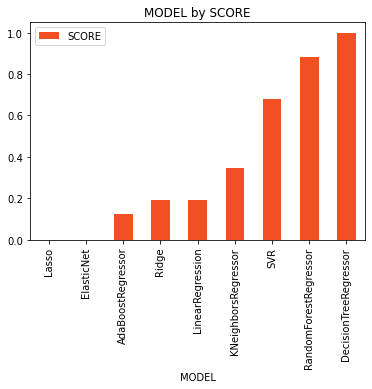

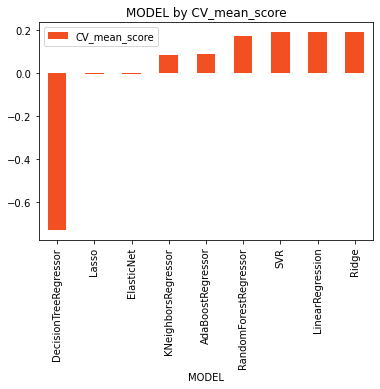

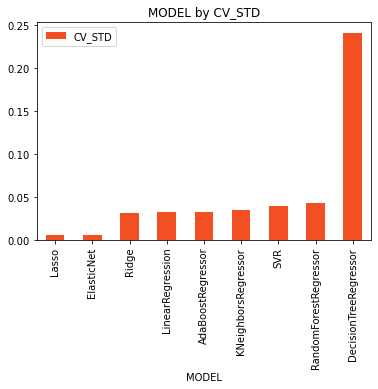

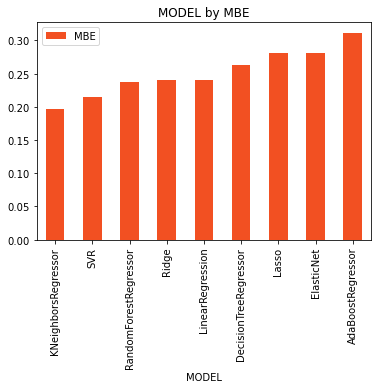

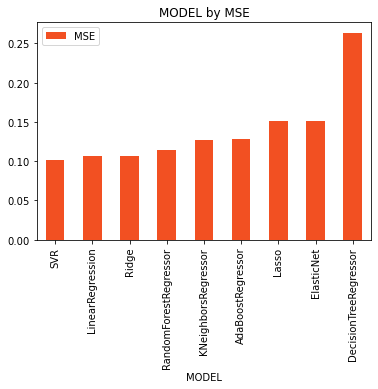

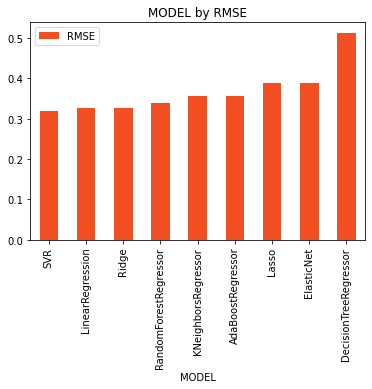

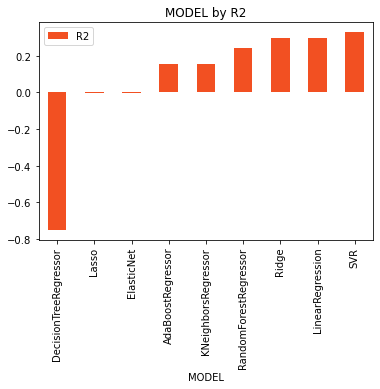

In [39]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = orange)
    plt.title(f"MODEL by {metric}")
    plt.show()

### From Above observation its is evident that Randomforest is the best model with Score of 0.88 and less errors which is more reliable than Decision tree lets try in Hyper tuning the same.

In [40]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train_1, y_train_1, cv=5, n_jobs=-1).mean()

0.17086206896551726

In [41]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [42]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

In [43]:
reg_grid = GridSearchCV(rf, param_grid, n_jobs=-1, cv=5)

In [44]:
reg_grid.fit(x_train_1, y_train_1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}])

In [45]:
reg_grid.best_score_

0.15739821801964807

In [46]:
reg_grid.best_estimator_

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=50,
                      random_state=42)

In [47]:
reg_final_model = reg_grid.best_estimator_
preds = cross_val_predict(reg_final_model, x_train_1, y_train_1, cv=5, n_jobs=-1)
preds.mean()

0.16560798548094374

In [48]:
reg_final_model.fit(x_train_1,y_train_1)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=50,
                      random_state=42)

In [49]:
reg_final_model.score(x_train_1,y_train_1)

1.0

### Post the hyper tuning we can see that the performance of the RandomForest Regressor has increased from 88% - 100% with minimal error.

# Summary:
>We started our Pre-Processing pipeline with replacing Attrition attributes as "Yes" - 1 and "No" - 0.
> And further we cleanced the data on seeing the columns that have high correlation with the Target Variable.
The correlation is very less in all the variable with Target variable but however the top two contestants are

                              OverTime                    0.246118
                              TotalWorkingYears          -0.171063
>Employees who have more work experience trends not to leave organization which is logically true and
Employees who do over time trends leaving the organization.

### Skewness and Outliers
>We continued with further cleansing of data with identifying the skewness of the data and outliers the skewness we have corrected with "yeojohnson" method and we have decided to work with outliers in the data since removal of it seemed not possible.

### Shortlisting Models. 
> On examining the performance of nine models we have shotlisted Random forest Regressor and hyper tuned the samewith the increased R2 score.

                    MODEL	    SCORE	     CV_mean     CV_STD	     MBE	     MSE	      RMSE       R2
    1	DecisionTreeRegressor	1.000000	-0.728145	0.240944	0.263587	0.263587	0.513407   -0.749804
    2   RandomForestRegressor	 0.882209	 0.173189	0.042564	0.237473	0.114395	0.338224	0.240594
    3	                 SVR	 0.681178	 0.190308	0.038882	0.214719	0.101282	0.318248	0.327647
    4	  KNeighborsRegressor	0.345273	 0.083669	0.034314	0.197283	0.127065	0.356462	0.156486
    5	     LinearRegression	0.193413	 0.190978	0.031903	0.239974	0.106431	0.326238	0.293462
    6	                Ridge	0.193294	 0.191704	0.031389	0.239654	0.106495	0.326336	0.293037
    7	    AdaBoostRegressor	0.124005	 0.087904	0.032376	0.311636	0.127664	0.357301	0.152512
    8	                Lasso	0.000000	-0.004319	0.005533	0.281465	0.151626	0.389391   -0.006556
    9	           ElasticNet	0.000000	-0.004319	0.005533	0.281465	0.151626	0.389391   -0.006556

    

# HR Analytics

>Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

##### We will same our model for further use in the prodiction.

# Saving our model

In [50]:
import joblib
joblib.dump(reg_final_model,"Attrition_prediction.obj")

['Attrition_prediction.obj']

# Conclusion:
>In this Study the Employee-Attrition Dataset which contain 1470 records of employee data who worked in different department and also have different set have of exprience we analysised why the attrition is happening in the organization with 35 different attributes and the top 10 major factors for attritions as per our research are.

                           1. OverTime                    
                           2. MaritalStatus               
                           3. DistanceFromHome            
                           4. JobRole                     
                           5. Department                  
                           6. NumCompaniesWorked          
                           7. Gender                      
                           8. EducationField              
                           9. MonthlyRate                 
                          10. PerformanceRating           
    
    
>This is sorted s per the Correlation with the attrition data. Further this study will help Human Resource Team/Hiring Team to analyse and know about the factors of how to convert a employee who is willing to leave the organization.

                            1. JobSatisfaction            
                            2. JobInvolvement             
                            3. YearsAtCompany             
                            4. StockOptionLevel           
                            5. YearsWithCurrManager       
                            6. Age                        
                            7. MonthlyIncome              
                            8. YearsInCurrentRole         
                            9. JobLevel                   
                           10. TotalWorkingYears 
  
>A strategic retention plan can be created with the above mention factors and direct tete-a-tete meeting and skip level meeting and also periodically with employee wellness team employee carrier developement program can be created with a survey with all the above factors.  